# Recognition of handwritten digit: A neural network approach

Handwritten digit recognition is a good first-lesson on image recognition for beginners.
<br />  
The MNIST dataset consists 60000 training examples and 10000 test examples, of digits 0-9, can be downloaded from [Yann Lecun's website](http://yann.lecun.com/exdb/mnist/).
<br />  
In this project we will:

- Implement a 2-layer neural network.
- Compute the forward pass and backward pass with svm loss.
- Use the normlizaiton to help network converge.
- Use a stochastic gradient descent to optimize the loss function.

In [61]:
from data_utils import loadMNIST

from __future__ import print_function
from two_layer_net import *
from three_layer_net import *

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data
Load the MNIST data to train a neural network. The data is located at `'dataset/'` directory, you should download the 4 ubyte files from [Yann Lecun's website](http://yann.lecun.com/exdb/mnist/) and unextract it in the right directory before loading. Dataset directory may vary when you change the location of you project folder, or use a different operating system. Make sure to modify `data_utils.py` when you change the dataset location.

In [62]:
X_train, y_train = loadMNIST(dataset="training", num_image=60000)
X_test, y_test = loadMNIST(dataset="test", num_image=10000)

print("Loaded training images of shape:", X_train.shape)
print("Loaded training labels of shape:", y_train.shape)
print("Loaded test images of shape", X_test.shape)
print("Loaded test labels of shape", y_test.shape)

Loaded training images of shape: (60000, 28, 28)
Loaded training labels of shape: (60000,)
Loaded test images of shape (10000, 28, 28)
Loaded test labels of shape (10000,)


# Show some random images
Show some random images to get a gut feeling of how the data looks like.
Make sure `row * col` is less than the size of training set example number.
To adjust the size of plot size, just modify: `plt.rcParams['figure.figsize']` on the first code block.

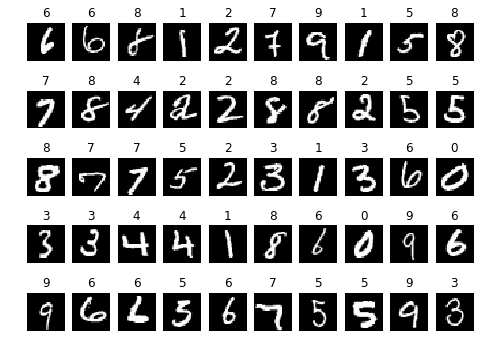

In [63]:
row, col = 5, 10
idx = np.random.choice(X_train.shape[0], row*col, replace=False)
for i in range(row):
    for j in range(col):
        plt_idx = idx[i*col+j]
        plt.subplot(row, col, i*col+j+1)
        plt.title(y_train[plt_idx])
        plt.imshow(X_train[plt_idx,:,:])
        plt.axis('off')

plt.show()

# Preprocess the data
## Part.1
In this part, we preprocess the data by:

- Split training set data to train and validation.
- Normalize the data

In [64]:
X_train, y_train = loadMNIST(dataset="training", num_image=60000)
X_test, y_test = loadMNIST(dataset="test", num_image=10000)

# Split the data into train, val, and test sets. 
num_training = 50000
num_validation = 10000
num_test = 10000

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]


# Normalize the data: subtract the mean image
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image


print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 28, 28)
Train labels shape:  (50000,)
Validation data shape:  (10000, 28, 28)
Validation labels shape:  (10000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


## Part.2
Reshape the 3 dimension data to a `[N * (row * col)]` 2 dimension matrix.
`N` is the number of examples, `(row, col)` is the shape of an example image.

In [65]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (50000, 784)
Validation data shape:  (10000, 784)
Test data shape:  (10000, 784)


# Overfit Small Dataset
Training with a small dataset, i.e. a training set with 500 example images, we should see an overfitting model.

In [66]:
# Preprocessing: reshape the image data into rows
X_train_small = X_train[:500, :]
y_train_small = y_train[:500]
# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train_small.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (500, 784)
Validation data shape:  (10000, 784)
Test data shape:  (10000, 784)


In [67]:
input_size = 28 * 28
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train_small, y_train_small, X_val, y_val,
            num_iters=1000, batch_size=50,
            learning_rate=1e-4, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train_small) == y_train_small).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 1000: loss 9.000232 val_acc 0.151400
iteration 100 / 1000: loss 1.798926 val_acc 0.645300
iteration 200 / 1000: loss 0.549080 val_acc 0.815800
iteration 300 / 1000: loss 0.271537 val_acc 0.838300
iteration 400 / 1000: loss 0.155576 val_acc 0.848400
iteration 500 / 1000: loss 0.127119 val_acc 0.852500
iteration 600 / 1000: loss 0.178262 val_acc 0.855400
iteration 700 / 1000: loss 0.057728 val_acc 0.857300
iteration 800 / 1000: loss 0.136441 val_acc 0.857300
iteration 900 / 1000: loss 0.045711 val_acc 0.857500
Validation accuracy:  0.8566
Train accuracy:  0.998


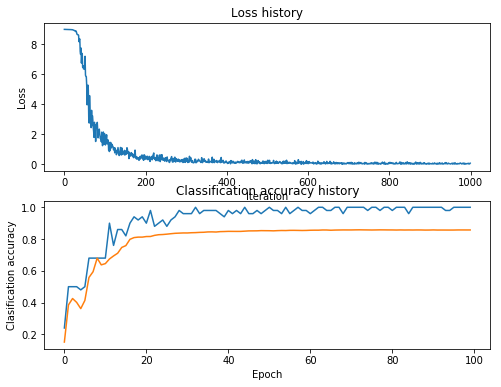

In [68]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

# Training
Train a two layer neural network, update gradients with mini-batch data, optimize the loss with SGD.


In [69]:
input_size = 28 * 28
hidden_size = 200
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=20000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train) == y_train).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 20000: loss 9.000541 val_acc 0.144400
iteration 100 / 20000: loss 1.383260 val_acc 0.812200
iteration 200 / 20000: loss 0.740626 val_acc 0.882300
iteration 300 / 20000: loss 0.541315 val_acc 0.898200
iteration 400 / 20000: loss 0.345105 val_acc 0.908000
iteration 500 / 20000: loss 0.415290 val_acc 0.916100
iteration 600 / 20000: loss 0.427129 val_acc 0.920500
iteration 700 / 20000: loss 0.375660 val_acc 0.922600
iteration 800 / 20000: loss 0.456690 val_acc 0.926200
iteration 900 / 20000: loss 0.425164 val_acc 0.929000
iteration 1000 / 20000: loss 0.501674 val_acc 0.931100
iteration 1100 / 20000: loss 0.383950 val_acc 0.932600
iteration 1200 / 20000: loss 0.399619 val_acc 0.934000
iteration 1300 / 20000: loss 0.451875 val_acc 0.936600
iteration 1400 / 20000: loss 0.285730 val_acc 0.937000
iteration 1500 / 20000: loss 0.259032 val_acc 0.940200
iteration 1600 / 20000: loss 0.320332 val_acc 0.941700
iteration 1700 / 20000: loss 0.343584 val_acc 0.943300
iteration 1800 / 20000

iteration 14900 / 20000: loss 0.187502 val_acc 0.975400
iteration 15000 / 20000: loss 0.134737 val_acc 0.975400
iteration 15100 / 20000: loss 0.150987 val_acc 0.976200
iteration 15200 / 20000: loss 0.145555 val_acc 0.975900
iteration 15300 / 20000: loss 0.099002 val_acc 0.976300
iteration 15400 / 20000: loss 0.161405 val_acc 0.975900
iteration 15500 / 20000: loss 0.186079 val_acc 0.975800
iteration 15600 / 20000: loss 0.185615 val_acc 0.975700
iteration 15700 / 20000: loss 0.141601 val_acc 0.975900
iteration 15800 / 20000: loss 0.143273 val_acc 0.975700
iteration 15900 / 20000: loss 0.135155 val_acc 0.976700
iteration 16000 / 20000: loss 0.105231 val_acc 0.976000
iteration 16100 / 20000: loss 0.177479 val_acc 0.976400
iteration 16200 / 20000: loss 0.158789 val_acc 0.976400
iteration 16300 / 20000: loss 0.146420 val_acc 0.976500
iteration 16400 / 20000: loss 0.151150 val_acc 0.975700
iteration 16500 / 20000: loss 0.133213 val_acc 0.976300
iteration 16600 / 20000: loss 0.136509 val_acc 0

# Debug the training
The loss history indicates whether loss is converging.
Overfitting or underfitting can be observed from classification accuracy history.
If there is a big gap between training accuracy and validation accuracy curves, the model is highly possible overfitting. Else if the training accuracy is low, and validation accuracy alike, the model might be underfitting.
To avoid such occasions, fine tune the parameters with your observation on the plots.

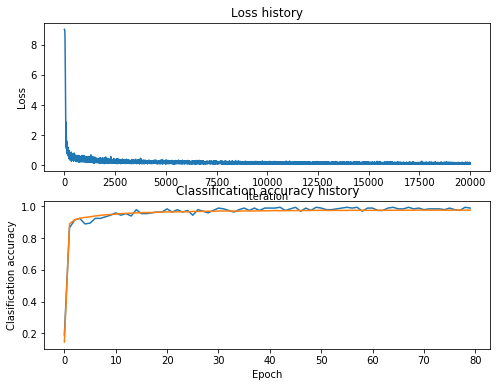

In [70]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

# Performance of the model
Now it's time to finally evaluate our model, with test set data.

In [71]:
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.9755


# Show some random image and predict using our model

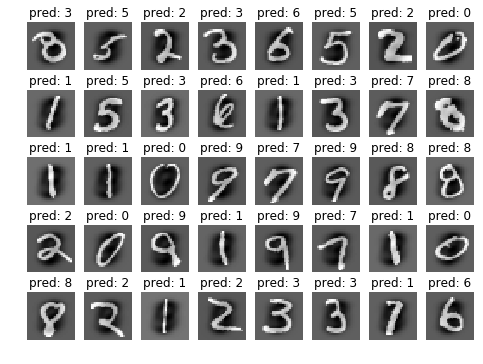

In [72]:
row, col = 5, 8
y_test_pred = net.predict(X_test)
X_test_image = X_test.reshape(-1, 28, 28)
idx = np.random.choice(X_test.shape[0], row*col, replace=False)
for i in range(row):
    for j in range(col):
        plt_idx = idx[i*col+j]
        plt.subplot(row, col, i*col+j+1)
        plt.title('pred: ' + str(y_test_pred[plt_idx]))
        plt.imshow(X_test_image[plt_idx,:,:])
        plt.axis('off')

plt.show()

# Use a Residual Block
The 2-layer plain neural network has achieved a accuracy of 97.2%. 
In this section we will use a three layer neural network, add a shortcut to bypass the first two layers, thus feed the input directly to the second relu layer.

In [75]:
input_size = 28 * 28
hidden_size = 200
hidden2_size = 200
num_classes = 10
net = ThreeLayerNet(input_size, hidden_size, hidden2_size, num_classes, std = 0.01, use_Res=False)

# Train the network
stats = net.train(X_train_small, y_train_small, X_val, y_val,
            num_iters=1000, batch_size=50,
            learning_rate=1e-4, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train_small) == y_train_small).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 1000: loss 13.793954 val_acc 0.122800
iteration 100 / 1000: loss 6.774789 val_acc 0.720200
iteration 200 / 1000: loss 6.163614 val_acc 0.779800
iteration 300 / 1000: loss 5.681477 val_acc 0.802500
iteration 400 / 1000: loss 5.227117 val_acc 0.815300
iteration 500 / 1000: loss 5.391095 val_acc 0.823500
iteration 600 / 1000: loss 5.158414 val_acc 0.828700
iteration 700 / 1000: loss 5.206835 val_acc 0.832200
iteration 800 / 1000: loss 4.997941 val_acc 0.834100
iteration 900 / 1000: loss 5.026820 val_acc 0.836900
Validation accuracy:  0.8383
Train accuracy:  0.978


In [74]:
input_size = 28 * 28
hidden_size = 200
hidden2_size = 200
num_classes = 10
net = ThreeLayerNet(input_size, hidden_size, hidden2_size, num_classes, std = 0.01, use_Res=True)

# Train the network
stats = net.train(X_train_small, y_train_small, X_val, y_val,
            num_iters=1000, batch_size=50,
            learning_rate=1e-4, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train_small) == y_train_small).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 1000: loss 23.760829 val_acc 0.150400
iteration 100 / 1000: loss 8.915964 val_acc 0.741700
iteration 200 / 1000: loss 8.838721 val_acc 0.748200
iteration 300 / 1000: loss 8.792387 val_acc 0.747900
iteration 400 / 1000: loss 8.746011 val_acc 0.747800
iteration 500 / 1000: loss 8.715467 val_acc 0.747800
iteration 600 / 1000: loss 8.688006 val_acc 0.747600
iteration 700 / 1000: loss 8.663304 val_acc 0.747500
iteration 800 / 1000: loss 8.641073 val_acc 0.747500
iteration 900 / 1000: loss 8.621060 val_acc 0.747800
Validation accuracy:  0.748
Train accuracy:  1.0


In [76]:
input_size = 28 * 28
hidden_size = 200
hidden2_size = 200
num_classes = 10
net = ThreeLayerNet(input_size, hidden_size, hidden2_size, num_classes, std = 0.01, use_Res=False)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=15000, batch_size=50,
            learning_rate=1e-4, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train_small) == y_train_small).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 15000: loss 14.076620 val_acc 0.123200
iteration 100 / 15000: loss 7.310728 val_acc 0.777100
iteration 200 / 15000: loss 7.207053 val_acc 0.843200
iteration 300 / 15000: loss 5.662851 val_acc 0.862800
iteration 400 / 15000: loss 6.257540 val_acc 0.872300
iteration 500 / 15000: loss 5.595232 val_acc 0.884500
iteration 600 / 15000: loss 5.601497 val_acc 0.891200
iteration 700 / 15000: loss 4.977115 val_acc 0.897200
iteration 800 / 15000: loss 5.191040 val_acc 0.898000
iteration 900 / 15000: loss 5.413603 val_acc 0.904700
iteration 1000 / 15000: loss 5.377181 val_acc 0.908100
iteration 1100 / 15000: loss 4.803561 val_acc 0.910800
iteration 1200 / 15000: loss 5.113003 val_acc 0.913600
iteration 1300 / 15000: loss 4.701523 val_acc 0.914800
iteration 1400 / 15000: loss 4.734605 val_acc 0.919100
iteration 1500 / 15000: loss 5.033212 val_acc 0.918800
iteration 1600 / 15000: loss 4.846172 val_acc 0.920700
iteration 1700 / 15000: loss 4.941376 val_acc 0.924200
iteration 1800 / 1500

iteration 14900 / 15000: loss 1.806085 val_acc 0.965700
Validation accuracy:  0.966
Train accuracy:  0.966


In [77]:
input_size = 28 * 28
hidden_size = 200
hidden2_size = 200
num_classes = 10
net = ThreeLayerNet(input_size, hidden_size, hidden2_size, num_classes, std = 0.01, use_Res=True)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=15000, batch_size=50,
            learning_rate=1e-4, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train_small) == y_train_small).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 15000: loss 23.744488 val_acc 0.152900
iteration 100 / 15000: loss 9.610456 val_acc 0.850500
iteration 200 / 15000: loss 9.316059 val_acc 0.880600
iteration 300 / 15000: loss 9.272221 val_acc 0.889800
iteration 400 / 15000: loss 9.092698 val_acc 0.903400
iteration 500 / 15000: loss 9.051769 val_acc 0.913000
iteration 600 / 15000: loss 8.741218 val_acc 0.915600
iteration 700 / 15000: loss 8.666887 val_acc 0.922300
iteration 800 / 15000: loss 8.787563 val_acc 0.926000
iteration 900 / 15000: loss 9.284021 val_acc 0.926700
iteration 1000 / 15000: loss 8.455192 val_acc 0.930000
iteration 1100 / 15000: loss 8.495461 val_acc 0.932000
iteration 1200 / 15000: loss 8.655151 val_acc 0.934000
iteration 1300 / 15000: loss 8.437717 val_acc 0.937800
iteration 1400 / 15000: loss 8.367597 val_acc 0.939200
iteration 1500 / 15000: loss 8.385473 val_acc 0.940200
iteration 1600 / 15000: loss 8.336903 val_acc 0.939700
iteration 1700 / 15000: loss 8.189348 val_acc 0.937900
iteration 1800 / 1500

iteration 14900 / 15000: loss 5.201619 val_acc 0.969200
Validation accuracy:  0.9687
Train accuracy:  0.986


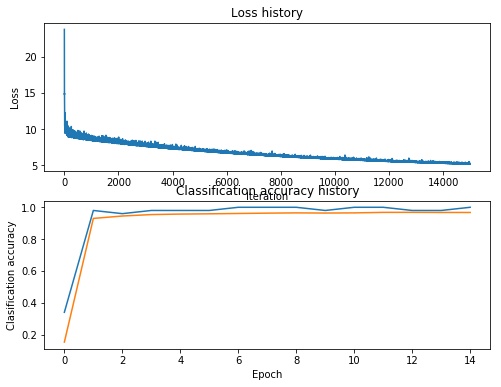

In [78]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [79]:
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.9659


# Acknowledgment
Some of the code and structure is copied from Stanford course [CS231n](https://cs231n.github.io) assignments. Lectured by Fei-Fei Li, Andrej Karpathy, Justion Johnson and Serena Yeung